## Bar Plots

For variables measured on a nominal or an ordinal scale it's common to use a bar plot to visualize their distribution. To generate a bar plot for the distribution of a variable we need two sets of values:

+ One set containing the unique values.
+ Another set containing the frequency for each unique value.


We can use `Series.value_counts()` to generate the table, and then use the `Series.plot.bar()` method on the resulting table to generate a bar plot. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
path = "data/wnba.csv"
wnba = pd.read_csv(path)

<AxesSubplot:>

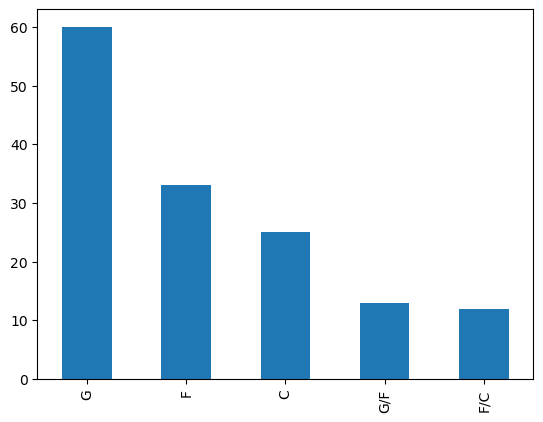

In [2]:
wnba['Pos'].value_counts().plot.bar()

The `Series.plot.bar()` method generates a vertical bar plot with the frequencies on the y-axis, and the unique values on the x-axis. To generate a horizontal bar plot, we can use the `Series.plot.barh()` method:


<AxesSubplot:>

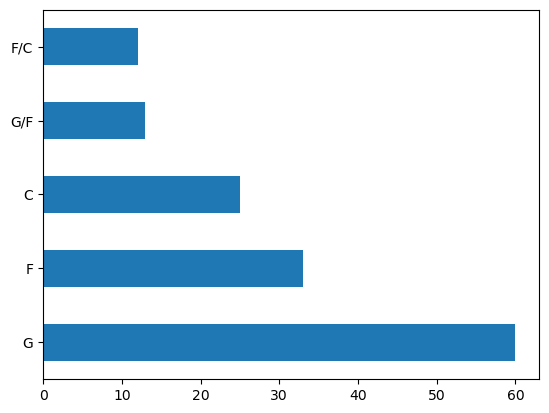

In [3]:
wnba['Pos'].value_counts().plot.barh()

### Rotating Axes

In [5]:
# wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar(rot = 45)

<AxesSubplot:title={'center':'Number of players in WNBA by position'}>

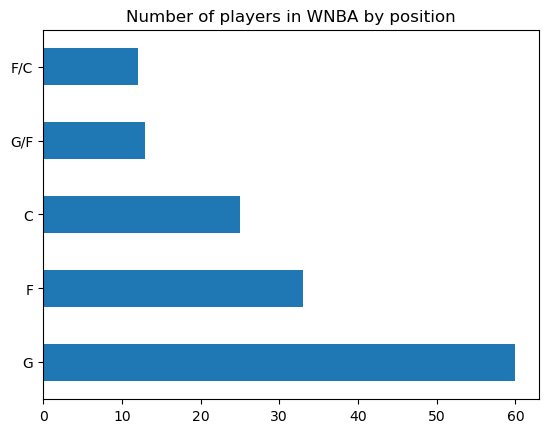

In [6]:
wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')